In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

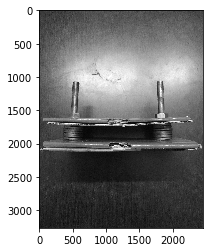

In [2]:
DATADIR = "C:\\Users\\srini\\NSR-180"

CATEGORIES = ["oksensor", "noksensor"]

for category in CATEGORIES:  # do oksensor and nok sensor
    path = os.path.join(DATADIR,category)  # create path to ok and nok sensor
    for img in os.listdir(path):  # iterate over each image per ok and nok sensor
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[52 52 48 ... 75 82 76]
 [51 51 49 ... 75 80 78]
 [54 53 50 ... 74 77 79]
 ...
 [35 38 39 ... 59 58 54]
 [27 34 38 ... 60 65 69]
 [24 34 43 ... 57 61 67]]


In [4]:
print(img_array.shape)

(3264, 2448)


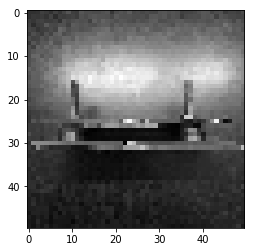

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

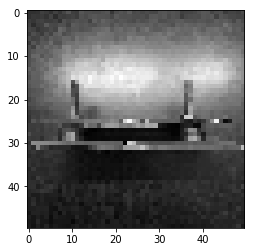

In [6]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # ok and noksensors

        path = os.path.join(DATADIR,category)  # create path to ok and noksensor
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=okksensor 1=noksensor

        for img in tqdm(os.listdir(path)):  # iterate over each image per ok and nok sensor
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 438/438 [00:42<00:00, 10.24it/s]


914


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
1
1
0
0
0


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 39]
   [ 45]
   [ 43]
   ...
   [ 80]
   [ 75]
   [ 57]]

  [[ 43]
   [ 36]
   [ 45]
   ...
   [ 89]
   [ 79]
   [ 80]]

  [[ 56]
   [ 43]
   [ 49]
   ...
   [ 86]
   [ 82]
   [ 80]]

  ...

  [[ 28]
   [ 21]
   [ 17]
   ...
   [100]
   [103]
   [ 87]]

  [[ 24]
   [ 29]
   [ 33]
   ...
   [ 95]
   [ 99]
   [ 89]]

  [[ 20]
   [ 24]
   [ 33]
   ...
   [ 92]
   [ 87]
   [ 91]]]]


In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)